# Implementation of ML Algorithms in Python 3.6.5

## 1. Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


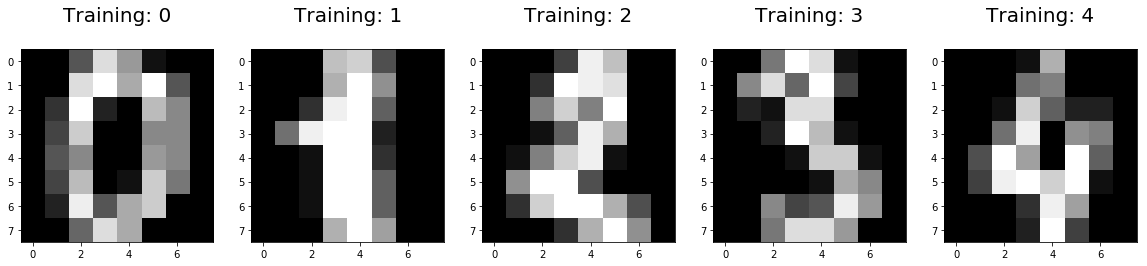

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [56]:
# all parameters not specified are set to their defaults
RF = RandomForestClassifier(max_depth=9, random_state=0)

In [57]:
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
predictions = RF.predict(x_test)

In [59]:
# Use score method to get accuracy of model
score = RF.score(x_test, y_test)
print(score)

0.9577777777777777


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  2  9  1  4  0  1  0]
 [ 0  0 33  4  1  0  1  0  4  1]
 [ 0  0  1 26  0  2  0  3  2 11]
 [ 1  0  0  0 33  0  0  4  0  0]
 [ 6  2  0  2  1 32  2  1  0  2]
 [ 3  1  0  0  1  0 47  0  0  0]
 [ 0  0  0  0  3  0  0 45  0  0]
 [ 0  6  6  2  4  1  0  9 20  0]
 [ 1  3  1  5  1  0  0  5  0 31]]


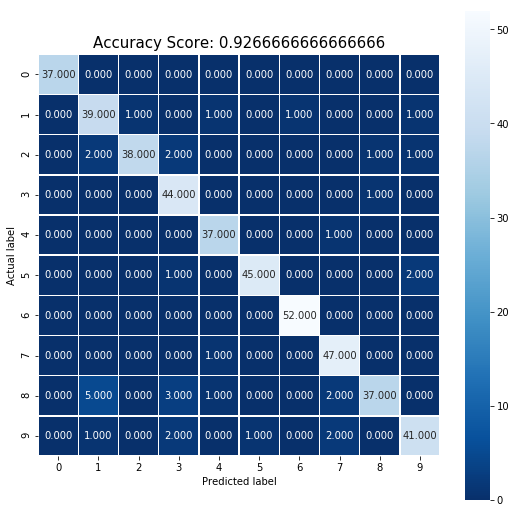

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);